In [2]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import requests
from datetime import datetime, timedelta

In [33]:
#get the yahoo data
ticker_symbol = "^GSPC"

ticker = yf.Ticker(ticker_symbol)

start_date = "2005-01-01"
end_date = (datetime.now() - timedelta(days=datetime.now().weekday() + 2)).strftime("%Y-%m-%d")
historical_data = ticker.history(start=start_date, end=end_date)
sp500_data = historical_data[["Open", "Close"]]

print(sp500_data.head())
sp500_data.to_csv("sp500_open_close.csv", index=True)
print("data saved sp500_open_close.csv")

                                  Open        Close
Date                                               
2005-01-03 00:00:00-05:00  1211.920044  1202.079956
2005-01-04 00:00:00-05:00  1202.079956  1188.050049
2005-01-05 00:00:00-05:00  1188.050049  1183.739990
2005-01-06 00:00:00-05:00  1183.739990  1187.890015
2005-01-07 00:00:00-05:00  1187.890015  1186.189941
data saved sp500_open_close.csv


In [34]:
API_KEY = "e4d0cd3909f4ad1a5a9662303565ea43"


series_id = "CPIAUCSL"
start_date = "2005-01-01"
end_date = (datetime.now() - timedelta(days=datetime.now().weekday() + 2)).strftime("%Y-%m-%d")
url = f"https://api.stlouisfed.org/fred/series/observations"

params = {
    "series_id": series_id,
    "api_key": API_KEY,
    "file_type": "json",
    "observation_start": start_date,
    "observation_end": end_date
}


response = requests.get(url, params=params)


if response.status_code == 200:
    data = response.json()
    if "observations" in data:

        observations = data["observations"]

        df = pd.DataFrame(observations)


        df = df[["date", "value"]]
        df.rename(columns={"date": "Date", "value": "CPI"}, inplace=True)

        df["Date"] = pd.to_datetime(df["Date"])
        df["CPI"] = pd.to_numeric(df["CPI"], errors="coerce")


        csv_filename = "CPIAUCSL_Data.csv"
        df.to_csv(csv_filename, index=False)

        print(f"data loaded {csv_filename}")
    else:
        print("no data founded")
else:
    print(f"request failed: {response.status_code}")

data loaded CPIAUCSL_Data.csv


In [103]:
#data

sp500_data = pd.read_csv('sp500_open_close.csv')
print(sp500_data.head())

yelp_data = pd.read_csv('yelp_finalProjectData.csv')
print(yelp_data.head())

cpi_data = pd.read_csv('CPIAUCSL_Data.csv')
print(cpi_data.head())

                        Date         Open        Close
0  2005-01-03 00:00:00-05:00  1211.920044  1202.079956
1  2005-01-04 00:00:00-05:00  1202.079956  1188.050049
2  2005-01-05 00:00:00-05:00  1188.050049  1183.739990
3  2005-01-06 00:00:00-05:00  1183.739990  1187.890015
4  2005-01-07 00:00:00-05:00  1187.890015  1186.189941
              business_id category_name        date  stars          city
0  MTSW4McQd7CbVtyjqoe9mw  Coffee & Tea  2014-05-26      4  Philadelphia
1  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2013-05-28      4      Edmonton
2  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2012-11-06      3      Edmonton
3  lk9IwjZXqUMqqOhM774DtQ  Coffee & Tea  2017-12-29      1     Nashville
4  ppFCk9aQkM338Rgwpl2F5A  Coffee & Tea  2015-10-23      1  Philadelphia
         Date    CPI
0  2005-01-01  191.6
1  2005-02-01  192.4
2  2005-03-01  193.1
3  2005-04-01  193.7
4  2005-05-01  193.6


In [104]:
#sp500_data cleaning
sp500_data['Date'] = sp500_data['Date'].str[:10]

#rename sp500_data["Date"]
sp500_data.rename(columns={'Date': 'date'}, inplace=True)

#yelp_data cleaning
#add a new column to yelp_data df
yelp_data['date_m'] = yelp_data['date'].str[0:7]
yelp_data['date'] = yelp_data['date'].str[:10]

#cpi_data cleaning
cpi_data['Date']=cpi_data['Date'].str[0:7]
cpi_data.rename(columns={'Date': 'date_m'}, inplace=True)

In [75]:
#checking for balance
balance_table = yelp_data.groupby('city').count()
balance_table['observations'] = yelp_data['city'].value_counts()
balance_table

,business_id,category_name,date,stars,date_m,observations
city,,,,,,
Bala Cynwyd,2,2,2,2,2,2
Boise,16,16,16,16,16,16
Brandon,4,4,4,4,4,4
Bristol,1,1,1,1,1,1
Cherry Hill,1,1,1,1,1,1
Clearwater,17,17,17,17,17,17
Collegeville,1,1,1,1,1,1
Doylestown,1,1,1,1,1,1
Dunedin,18,18,18,18,18,18


In [76]:
#remove anything below 10 observations
yelp_data = yelp_data.groupby('city').filter(lambda x: len(x) > 10)
yelp_data['city'].unique()

array(['Philadelphia', 'Edmonton', 'Nashville', 'Santa Barbara', 'Tampa',
       'Newtown', 'New Orleans', 'Boise', 'Moorestown', 'Indianapolis',
       'Clearwater', 'Maplewood', 'Reno', 'Tucson', 'Saint Louis',
       'Dunedin'], dtype=object)

In [77]:
#check for balance on average stars
balance_table = yelp_data.groupby('city')['stars'].mean()
balance_table['observations'] = yelp_data['city'].value_counts()
balance_table

,stars
city,
Boise,4.5
Clearwater,4.764706
Dunedin,4.388889
Edmonton,4.0
Indianapolis,4.514286
Maplewood,3.619048
Moorestown,4.533333
Nashville,4.0
New Orleans,4.402439


In [106]:
#join yelp_data with sp500_data on date
yelp_sp500_data = yelp_data.merge(sp500_data, how = 'left', on = 'date')
yelp_cpi_data = yelp_data.merge(cpi_data, how = 'left', on = 'date_m')
print(yelp_sp500_data.head())
print(yelp_cpi_data.head())

              business_id category_name        date  stars          city  \
0  MTSW4McQd7CbVtyjqoe9mw  Coffee & Tea  2014-05-26      4  Philadelphia   
1  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2013-05-28      4      Edmonton   
2  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2012-11-06      3      Edmonton   
3  lk9IwjZXqUMqqOhM774DtQ  Coffee & Tea  2017-12-29      1     Nashville   
4  ppFCk9aQkM338Rgwpl2F5A  Coffee & Tea  2015-10-23      1  Philadelphia   

    date_m         Open        Close  
0  2014-05          NaN          NaN  
1  2013-05  1652.630005  1660.060059  
2  2012-11  1417.260010  1428.390015  
3  2017-12  2689.149902  2673.610107  
4  2015-10  2058.189941  2075.149902  
              business_id category_name        date  stars          city  \
0  MTSW4McQd7CbVtyjqoe9mw  Coffee & Tea  2014-05-26      4  Philadelphia   
1  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2013-05-28      4      Edmonton   
2  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2012-11-06      3      Edmonton   
3  lk

In [110]:
#remove data with null values
yelp_sp500_data = yelp_sp500_data.dropna()
print(yelp_sp500_data.count())
yelp_cpi_data = yelp_cpi_data.dropna()
print(yelp_cpi_data.count())

business_id      622
category_name    622
date             622
stars            622
city             622
date_m           622
Open             622
Close            622
dtype: int64
business_id      1000
category_name    1000
date             1000
stars            1000
city             1000
date_m           1000
CPI              1000
dtype: int64


In [111]:
#view cleaned data
yelp_sp500_data

,business_id,category_name,date,stars,city,date_m,Open,Close
223,p24n1vScP_MHxJVPrao-jA,Coffee & Tea,2005-05-11,4,Saint Louis,2005-05,1166.219971,1171.109985
310,dD2p903p8lU0IgXT3OFluA,Coffee & Tea,2008-05-01,4,Nashville,2008-05,1385.969971,1409.339966
885,p24n1vScP_MHxJVPrao-jA,Coffee & Tea,2008-05-20,5,Saint Louis,2008-05,1424.489990,1413.400024
642,1feuZITxuTrl9mr7V11kwQ,Coffee & Tea,2008-12-08,5,Tucson,2008-12,882.710022,909.700012
776,14ZGwnDyydXdSBsLXpSUrA,Coffee & Tea,2008-12-22,4,Philadelphia,2008-12,887.200012,871.630005
...,...,...,...,...,...,...,...,...
257,GOSVLhjUT6TnrPhkkmDOpw,Coffee & Tea,2018-09-25,5,Philadelphia,2018-09,2921.750000,2915.560059
491,DZdE09qqCcX7Atf3Df7Yqg,Coffee & Tea,2018-09-25,1,Nashville,2018-09,2921.750000,2915.560059
921,9_m_iA3VAqGBJEW5XLc-5w,Coffee & Tea,2018-09-27,5,Indianapolis,2018-09,2911.649902,2914.000000
792,EQ-TZ2eeD_E0BHuvoaeG5Q,Coffee & Tea,2018-09-27,2,Indianapolis,2018-09,2911.649902,2914.000000


In [112]:
#viewing cleaned data
yelp_cpi_data

,business_id,category_name,date,stars,city,date_m,CPI
0,MTSW4McQd7CbVtyjqoe9mw,Coffee & Tea,2014-05-26,4,Philadelphia,2014-05,236.918
1,WKMJwqnfZKsAae75RMP6jA,Coffee & Tea,2013-05-28,4,Edmonton,2013-05,231.893
2,WKMJwqnfZKsAae75RMP6jA,Coffee & Tea,2012-11-06,3,Edmonton,2012-11,231.249
3,lk9IwjZXqUMqqOhM774DtQ,Coffee & Tea,2017-12-29,1,Nashville,2017-12,247.805
4,ppFCk9aQkM338Rgwpl2F5A,Coffee & Tea,2015-10-23,1,Philadelphia,2015-10,237.733
...,...,...,...,...,...,...,...
995,89COhCW-cAD5-fTXPfXYTw,Coffee & Tea,2015-09-12,4,Maplewood,2015-09,237.498
996,89COhCW-cAD5-fTXPfXYTw,Coffee & Tea,2015-11-07,5,Maplewood,2015-11,238.017
997,89COhCW-cAD5-fTXPfXYTw,Coffee & Tea,2016-06-26,3,Maplewood,2016-06,240.222
998,89COhCW-cAD5-fTXPfXYTw,Coffee & Tea,2013-12-22,1,Maplewood,2013-12,234.719


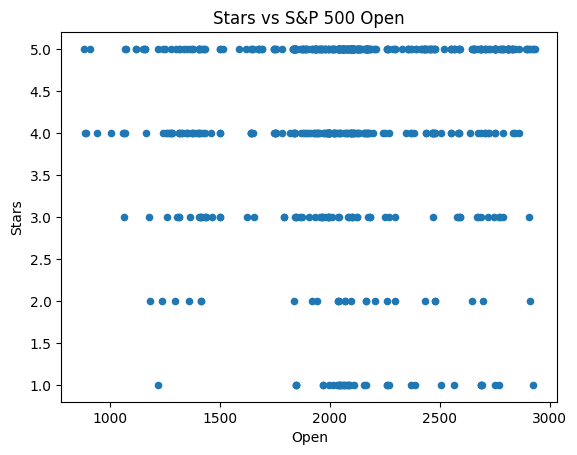

In [114]:
yelp_sp500_data.plot(x='Open', y='stars', kind='scatter')
plt.title('Stars vs S&P 500 Open')
plt.xlabel('Open')
plt.ylabel('Stars')
plt.show()

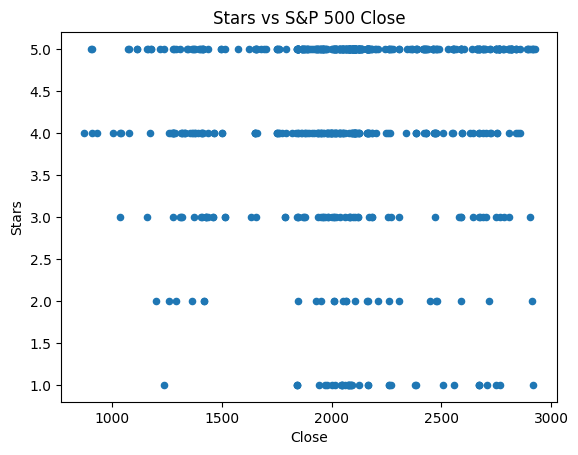

In [115]:
#how does stars relate to the close
yelp_sp500_data.plot(x='Close', y='stars', kind='scatter')
plt.title('Stars vs S&P 500 Close')
plt.xlabel('Close')
plt.ylabel('Stars')
plt.show()

In [116]:
#correlation between stars and open and close
yelp_sp500_data_corr = yelp_sp500_data[['stars', 'Open','Close']]
yelp_sp500_data_corr.corr()

,stars,Open,Close
stars,1.000000,0.040307,0.040331
Open,0.040307,1.000000,0.999480
Close,0.040331,0.999480,1.000000


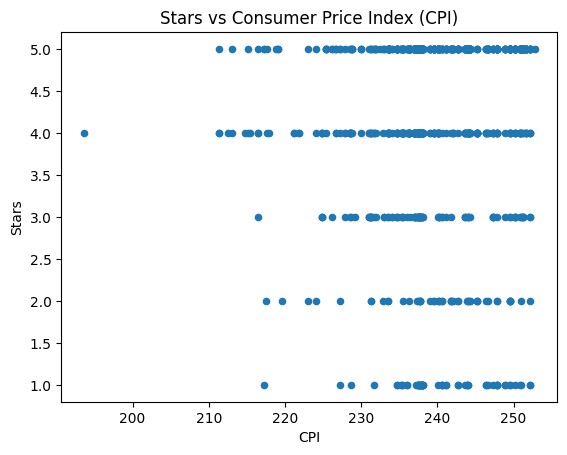

In [117]:
#how does stars relate to the cpi
yelp_cpi_data.plot(x='CPI', y='stars', kind='scatter')
plt.title('Stars vs Consumer Price Index (CPI)')
plt.xlabel('CPI')
plt.ylabel('Stars')
plt.show()

In [118]:
#correlation between stars and cpi
yelp_cpi_data_corr = yelp_cpi_data[['stars', 'CPI']]
yelp_cpi_data_corr.corr()

,stars,CPI
stars,1.000000,0.040501
CPI,0.040501,1.000000
